In [292]:
from os import path
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd

import numpy as np

from datetime import datetime
from dateutil import tz

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

In [339]:
df = pd.read_csv("wattime_data.csv")
df["date"] = [datetime.fromisoformat(s[:-1]) for s in df["point_time"]]
df["month"] = [d.month for d in df["date"]]
df["day_of_week"] = [datetime.weekday(d) for d in df["date"]]
df["day_of_month"] = pd.DatetimeIndex(df['date']).day
df["time"] = pd.DatetimeIndex(df['date']).time
df["minute"] = [d.hour * 60 + d.minute for d in df["time"]]
df["hour"] = [d.hour for d in df["time"]]
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("point_time", axis=1)
df = df.rename(columns = {"value" : "MOER"})
df

,MOER,frequency,market,ba,datatype,version,date,month,day_of_week,day_of_month,time,minute,hour
0,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:00:00,1,0,1,00:00:00,0,0
1,1022.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:05:00,1,0,1,00:05:00,5,0
2,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:10:00,1,0,1,00:10:00,10,0
3,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:15:00,1,0,1,00:15:00,15,0
4,1021.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2018-01-01 00:20:00,1,0,1,00:20:00,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499146,1013.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 22:45:00,9,3,29,22:45:00,1365,22
499147,1015.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 22:50:00,9,3,29,22:50:00,1370,22
499148,1016.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 22:55:00,9,3,29,22:55:00,1375,22
499149,986.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-09-29 23:00:00,9,3,29,23:00:00,1380,23


In [329]:
df.sort_values(by="MOER", ascending=False).head(20)

,value,frequency,market,ba,datatype,version,date,month,day_of_week,day_of_month,time,minute,hour
433489,1358.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:55:00,2,6,13,23:55:00,1435,23
433488,1350.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:50:00,2,6,13,23:50:00,1430,23
433487,1335.0,300.0,RTM,CAISO_NORTH,MOER,3.0,2022-02-13 23:45:00,2,6,13,23:45:00,1425,23
308483,1283.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-06 23:55:00,12,6,6,23:55:00,1435,23
310494,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:30:00,12,6,13,23:30:00,1410,23
310496,1280.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:40:00,12,6,13,23:40:00,1420,23
310491,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:15:00,12,6,13,23:15:00,1395,23
310493,1278.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:25:00,12,6,13,23:25:00,1405,23
310495,1275.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-13 23:35:00,12,6,13,23:35:00,1415,23
310500,1273.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-12-14 00:00:00,12,0,14,00:00:00,0,0


In [295]:
df.sort_values(by="MOER").head(20)

,Unnamed: 0,point_time,value,frequency,market,ba,datatype,version,date,day_of_week,day_of_month,time,minute,hour
262003,779,2020-06-28T15:05:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:05:00,6,28,15:05:00,905,15
262002,780,2020-06-28T15:00:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:00:00,6,28,15:00:00,900,15
262589,193,2020-06-30T15:55:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-30 15:55:00,1,30,15:55:00,955,15
262588,194,2020-06-30T15:50:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-30 15:50:00,1,30,15:50:00,950,15
262586,196,2020-06-30T15:40:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-30 15:40:00,1,30,15:40:00,940,15
262005,777,2020-06-28T15:15:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:15:00,6,28,15:15:00,915,15
262006,776,2020-06-28T15:20:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:20:00,6,28,15:20:00,920,15
262007,775,2020-06-28T15:25:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:25:00,6,28,15:25:00,925,15
262008,774,2020-06-28T15:30:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:30:00,6,28,15:30:00,930,15
262010,772,2020-06-28T15:40:00.000Z,29.0,NaN,RTM,CAISO_NORTH,MOER,3.0,2020-06-28 15:40:00,6,28,15:40:00,940,15


<AxesSubplot:xlabel='value', ylabel='Count'>

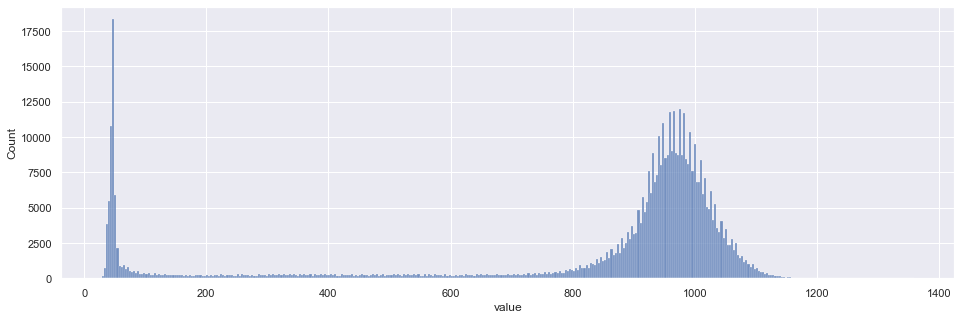

In [296]:
sns.set(rc={'figure.figsize':(16, 5)});
sns.histplot(data=df, x="MOER");

In [297]:
by_dow = df[["day_of_week", "MOER"]].groupby("day_of_week").mean()
by_dow["day_of_week"] = ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat", "Sun"]
by_dow

,value,day_of_week
day_of_week,,
0,823.780214,Mon
1,835.842592,Tues
2,834.640959,Wed
3,835.020736,Thu
4,827.848563,Fri
5,783.447549,Sat
6,763.188955,Sun


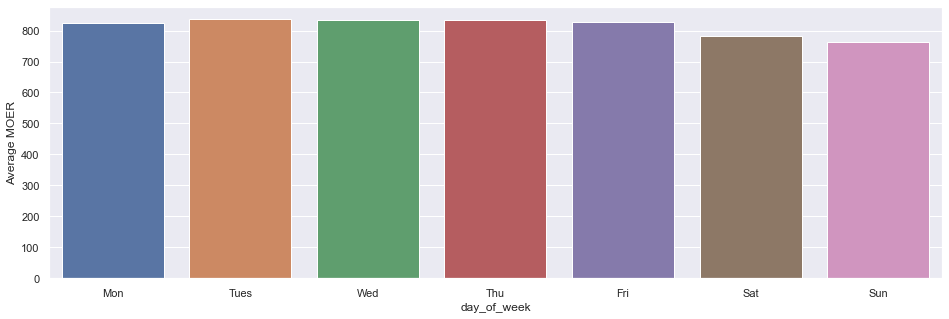

In [298]:
sns.barplot(data=by_dow, x="day_of_week", y="MOER")
plt.ylabel("Average MOER");

<AxesSubplot:xlabel='hour', ylabel='value'>

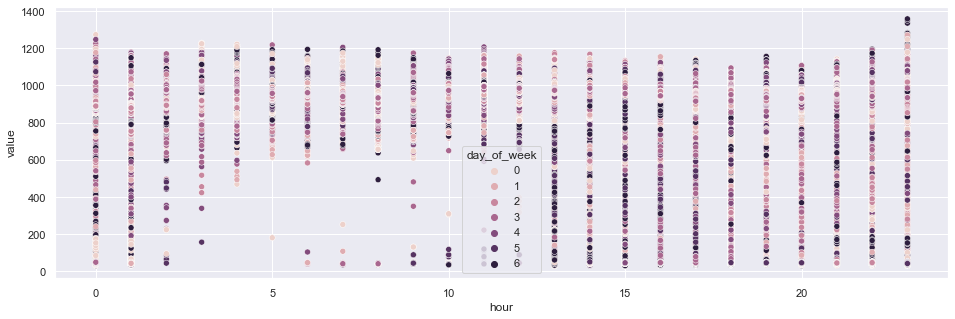

In [299]:
sns.scatterplot(data=df, x="hour", y="MOER", hue="day_of_week")

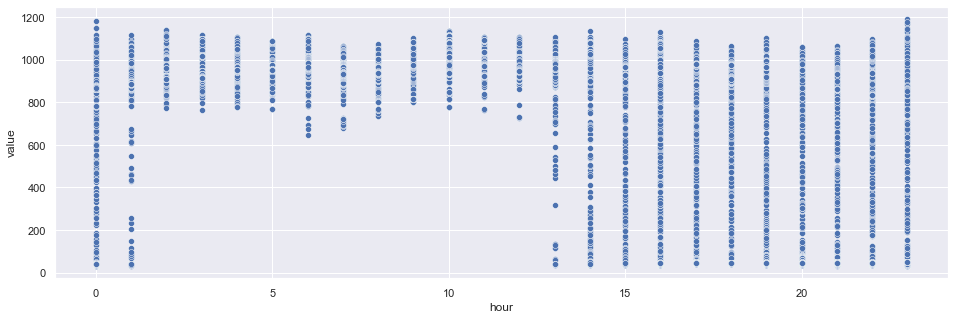

In [300]:
sns.scatterplot(data = df[df["day_of_month"] == 21], x="hour", y="MOER");

## Looking at MOER plots of the week of 1/11/21 (Monday) to 1/17/21 (Sunday):
Highest MOER: 1/12. Overcast. https://weatherspark.com/h/d/491/2021/1/12/Historical-Weather-on-Tuesday-January-12-2021-in-Berkeley-California-United-States#Figures-PrecipitationProbability

Lowest MOER: 1/17. Clear https://weatherspark.com/h/d/491/2021/1/17/Historical-Weather-on-Sunday-January-17-2021-in-Berkeley-California-United-States#Figures-CloudCover

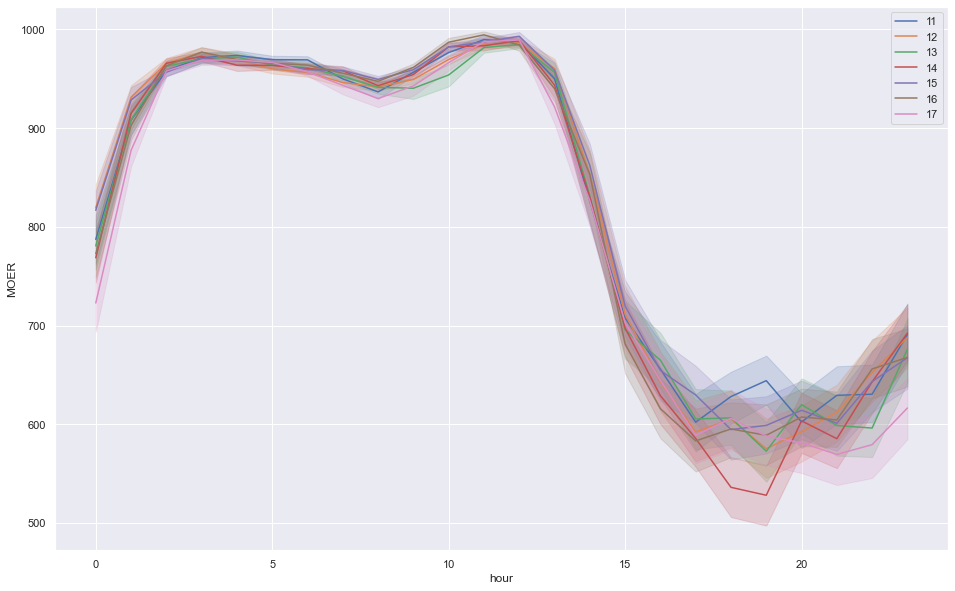

In [340]:
sns.set(rc={'figure.figsize':(16, 10)});
for i in range(11, 18):
    to_graph = df[df["day_of_month"] == i][["hour", "MOER"]].groupby("hour").mean()
    sns.lineplot(data = df[df["day_of_month"] == i], x="hour", y="MOER", label=i)

Looking at CO2 rates over the entire 2021 year.

In [341]:
by_month = df[["month", "MOER"]].groupby("month").mean()
by_month

,MOER
month,
1,903.519453
2,842.991234
3,812.467040
4,689.094850
5,593.806518
6,696.708275
7,800.492328
8,871.368418
9,862.271075


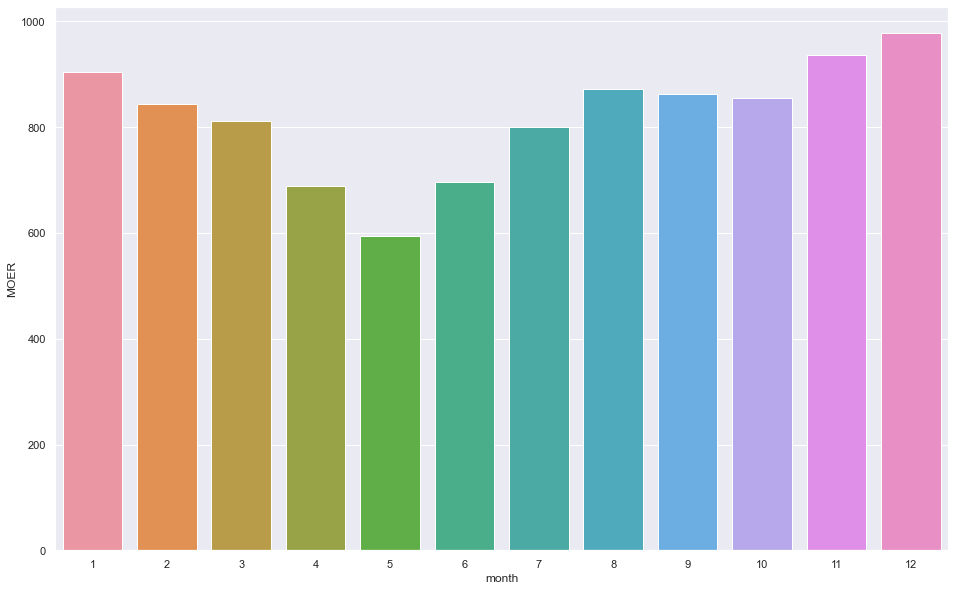

In [343]:
sns.barplot(data = by_month, x=by_month.index, y="MOER");